In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset = pd.read_csv('/studentscores-1fef94ba-27e1-4fab-a7ad-56867b8fb5a1.csv')
# print(dataset)
#plt.scatter(dataset['Hours'], dataset['Scores'])
#plt.show()


In [ ]:
X = dataset.iloc[:,:-1].values
Y = dataset.iloc[:,1].values
print(Y)

[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


In [ ]:
Y = MX+c

NameError: name 'MX' is not defined

In [ ]:
from typing_extensions import Self
class Model():

  def __init__(self,Learning_rate ,iteration):
    self.Learning_rate = Learning_rate
    self.iteration = iteration
  def predict(self,X):
    return X.dot(self.slope)+self.const
  def fit(self, X, Y):
    self.m,self.n = X.shape
    self.slope = np.zeros(self.n)
    self.const = 0
    self.X = X
    self.Y = Y

    for i in range(self.iteration):
      self.update_weights()
    return self
  def update_weights(self):
    Y_pred = self.predict(self.X)
    dW =-(2*(self.X.T).dot(self.Y-Y_pred))/self.m
    db=-2*np.sum(self.Y-Y_pred)/self.m
    self.slope=self.slope-self.Learning_rate*dW
    self.const=self.const-self.Learning_rate*db



In [ ]:
model =Model(Learning_rate=0.01,iteration=1000)
model.fit(X,Y)

[26.91171724 52.33687281 33.75695143 85.58515317 36.69062323 17.13281125
 92.43038736 56.24843521 83.62937197 28.86749844 77.76202838 60.1599976
 46.46952922 34.73484203 13.22124886 89.49671557 26.91171724 21.04437365
 62.1157788  74.82835658 28.86749844 49.40320102 39.62429503 69.93890359
 78.73991898]


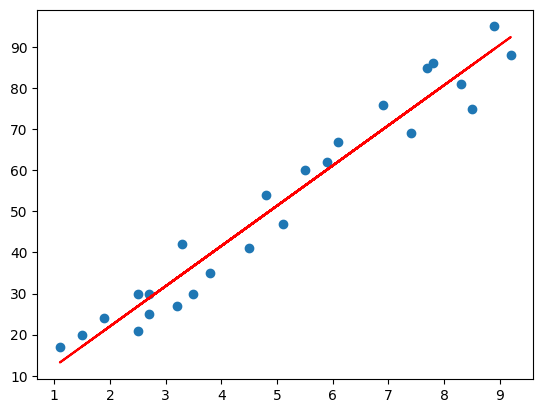

In [ ]:
Y_pred=model.predict(X)
print(Y_pred)
plt.scatter(dataset['Hours'],dataset['Scores'])
plt.plot(X,Y_pred,color='red')
plt.show()

In [ ]:
print(model.slope,model.const)

[9.77890599] 2.4644522714760995


In [ ]:

#4
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax
from matplotlib.animation import FuncAnimation

In [ ]:
url = 'https://media.geeksforgeeks.org/wp-content/uploads/20240320114716/data_for_lr.csv'
data = pd.read_csv(url)

data = data.dropna()

train_input = np.array(data.x[0:500]).reshape(500, 1)
train_output = np.array(data.y[0:500]).reshape(500, 1)

test_input = np.array(data.x[500:700]).reshape(199, 1)
test_output = np.array(data.y[500:700]).reshape(199, 1)

In [ ]:
class LinearRegression:
    def __init__(self):
        self.parameters = {}

    def forward_propagation(self, train_input):
        m = self.parameters['m']
        c = self.parameters['c']
        predictions = np.multiply(m, train_input) + c
        return predictions

    def cost_function(self, predictions, train_output):
        cost = np.mean((train_output - predictions) ** 2)
        return cost

    def backward_propagation(self, train_input, train_output, predictions):
        derivatives = {}
        df = (predictions-train_output)
        dm = 2 * np.mean(np.multiply(train_input, df))
        dc = 2 * np.mean(df)
        derivatives['dm'] = dm
        derivatives['dc'] = dc
        return derivatives

    def update_parameters(self, derivatives, learning_rate):
        self.parameters['m'] = self.parameters['m'] - learning_rate * derivatives['dm']
        self.parameters['c'] = self.parameters['c'] - learning_rate * derivatives['dc']

    def train(self, train_input, train_output, learning_rate, iters):
        self.parameters['m'] = np.random.uniform(0, 1) * -1
        self.parameters['c'] = np.random.uniform(0, 1) * -1

        self.loss = []

        fig, ax = plt.subplots()
        x_vals = np.linspace(min(train_input), max(train_input), 100)
        line, = ax.plot(x_vals, self.parameters['m'] * x_vals + self.parameters['c'], color='red', label='Regression Line')
        ax.scatter(train_input, train_output, marker='o', color='green', label='Training Data')

        ax.set_ylim(0, max(train_output) + 1)

        def update(frame):
            predictions = self.forward_propagation(train_input)
            cost = self.cost_function(predictions, train_output)
            derivatives = self.backward_propagation(train_input, train_output, predictions)
            self.update_parameters(derivatives, learning_rate)
            line.set_ydata(self.parameters['m'] * x_vals + self.parameters['c'])
            self.loss.append(cost)
            print("Iteration = {}, Loss = {}".format(frame + 1, cost))
            return line,

        ani = FuncAnimation(fig, update, frames=iters, interval=200, blit=True)
        ani.save('linear_regression_A.gif', writer='ffmpeg')

        plt.xlabel('Input')
        plt.ylabel('Output')
        plt.title('Linear Regression')
        plt.legend()
        plt.show()

        return self.parameters, self.loss

Iteration = 1, Loss = 3499.4813230305926
Iteration = 1, Loss = 1425.6888214227827
Iteration = 1, Loss = 1155.0683555200033
Iteration = 1, Loss = 1116.8624704814629
Iteration = 2, Loss = 1108.635067731523
Iteration = 3, Loss = 1104.2964168720216
Iteration = 4, Loss = 1100.4839364920585
Iteration = 5, Loss = 1096.764073609997
Iteration = 6, Loss = 1093.080763695665
Iteration = 7, Loss = 1089.4265935754374
Iteration = 8, Loss = 1085.8004215909052
Iteration = 9, Loss = 1082.2019157635123
Iteration = 10, Loss = 1078.6308498739197
Iteration = 11, Loss = 1075.0870127314563
Iteration = 12, Loss = 1071.5701964702894
Iteration = 13, Loss = 1068.0801950304806
Iteration = 14, Loss = 1064.616803951723
Iteration = 15, Loss = 1061.1798203363373
Iteration = 16, Loss = 1057.7690428341593
Iteration = 17, Loss = 1054.3842716303286
Iteration = 18, Loss = 1051.0253084335304
Iteration = 19, Loss = 1047.6919564643697
Iteration = 20, Loss = 1044.3840204438447
Iteration = 21, Loss = 1041.1013065819054
Iteratio

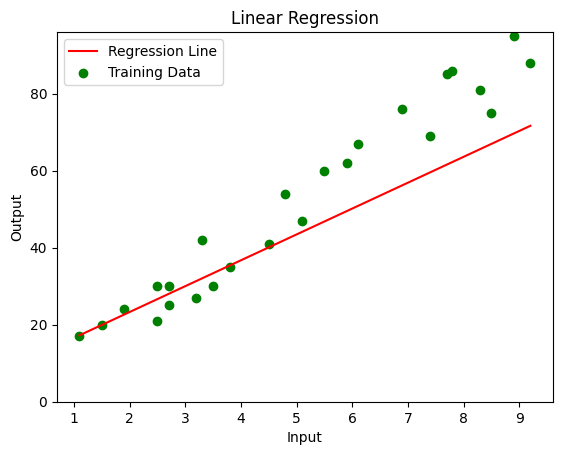

In [ ]:
model= LinearRegression()
parameters,loss = model.train(X,Y,learning_rate=0.01,iters=50)

In [ ]:

#5
dataset = pd.read_csv('//50_Startups-61ce93eb-d671-42db-a5e1-005e0a176393.csv')
x=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

In [ ]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
regressor.fit(x_train,y_train)
Y_pred=regressor.predict(x_test)
print(Y_pred)


[103901.8969696  132763.05993126 133567.90370044  72911.78976736
 179627.92567224 115166.64864795  67113.5769057   98154.80686776
 114756.11555221 169064.01408795]


In [ ]:
for i,(pred,actual) in enumerate(zip(Y_pred,y_test)):
  print(f"sample {i+1}: Predicted={pred:.2f}, Actual={actual:.2f}")

sample 1: Predicted=103901.90, Actual=103282.38
sample 2: Predicted=132763.06, Actual=144259.40
sample 3: Predicted=133567.90, Actual=146121.95
sample 4: Predicted=72911.79, Actual=77798.83
sample 5: Predicted=179627.93, Actual=191050.39
sample 6: Predicted=115166.65, Actual=105008.31
sample 7: Predicted=67113.58, Actual=81229.06
sample 8: Predicted=98154.81, Actual=97483.56
sample 9: Predicted=114756.12, Actual=110352.25
sample 10: Predicted=169064.01, Actual=166187.94


In [ ]:
print("coefficients:",regressor.coef_)
print("intercept:",regressor.intercept_)

coefficients: [0.77884104 0.0293919  0.03471025]
intercept: 42989.00816508669


In [ ]:
#6

dataset = pd.read_csv('/studentscores-1fef94ba-27e1-4fab-a7ad-56867b8fb5a1.csv')
X = dataset.iloc[:,:-1].values
Y = dataset.iloc[:,1].values


In [ ]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly= PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)
print(X_poly)

[[  1.      2.5     6.25   15.625]
 [  1.      5.1    26.01  132.651]
 [  1.      3.2    10.24   32.768]
 [  1.      8.5    72.25  614.125]
 [  1.      3.5    12.25   42.875]
 [  1.      1.5     2.25    3.375]
 [  1.      9.2    84.64  778.688]
 [  1.      5.5    30.25  166.375]
 [  1.      8.3    68.89  571.787]
 [  1.      2.7     7.29   19.683]
 [  1.      7.7    59.29  456.533]
 [  1.      5.9    34.81  205.379]
 [  1.      4.5    20.25   91.125]
 [  1.      3.3    10.89   35.937]
 [  1.      1.1     1.21    1.331]
 [  1.      8.9    79.21  704.969]
 [  1.      2.5     6.25   15.625]
 [  1.      1.9     3.61    6.859]
 [  1.      6.1    37.21  226.981]
 [  1.      7.4    54.76  405.224]
 [  1.      2.7     7.29   19.683]
 [  1.      4.8    23.04  110.592]
 [  1.      3.8    14.44   54.872]
 [  1.      6.9    47.61  328.509]
 [  1.      7.8    60.84  474.552]]


In [ ]:
model=LinearRegression()
model.fit(X_poly,Y)

LinearRegression()

In [ ]:
print(model.coef_)
print(model.intercept_)

[ 0.00000000e+00  6.21586126e-01  2.33149337e-01  1.68712196e-01
 -1.07680759e-06  1.84179513e-06  4.56286960e-07 -6.60859867e-07
 -1.22027973e-06 -3.71091254e-08]
27967.18700822057


In [ ]:
Y_pred=model.predict(X_poly)
print(Y_pred)

[25.55820366 52.4044897  31.56390366 85.43535572 34.50588455 19.71935048
 88.24070983 57.10586101 84.27233622 27.13600857 79.9579611  61.75002055
 45.40692604 32.52310457 18.5131056  87.29327399 25.55820366 21.60788253
 64.02753655 77.39372855 27.13600857 48.88540147 37.62366789 72.62482165
 80.75625387]


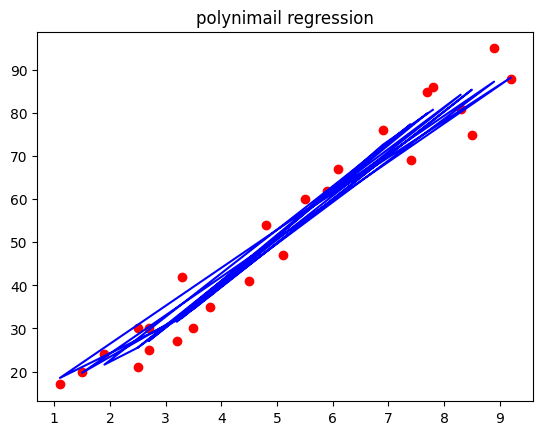

In [ ]:
plt.scatter(X,Y,color='red')
plt.plot(X,Y_pred,color='blue')
plt.title('polynimail regression')
plt.show()

In [ ]:
#6 (Task)

dataset = pd.read_csv('/50_Startups-61ce93eb-d671-42db-a5e1-005e0a176393.csv')
X = dataset.iloc[:,:-1].values
Y = dataset.iloc[:,1].values


In [ ]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly= PolynomialFeatures(degree=5)
X_poly = poly.fit_transform(X)
print(X_poly)

[[1.00000000e+00 1.65349200e+05 1.36897800e+05 ... 1.96798978e+27
  6.78218559e+27 2.33731099e+28]
 [1.00000000e+00 1.62597700e+05 1.51377590e+05 ... 2.00435339e+27
  5.87755111e+27 1.72352876e+28]
 [1.00000000e+00 1.53441510e+05 1.01145550e+05 ... 6.94488401e+26
  2.80097154e+27 1.12967208e+28]
 ...
 [1.00000000e+00 0.00000000e+00 1.35426920e+05 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 5.42050000e+02 5.17431500e+04 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 0.00000000e+00 1.16983800e+05 ... 1.26150792e+24
  4.87128755e+23 1.88103793e+23]]


[ 1.62934766e-07 -2.16829312e-09  5.25634333e-10 -7.84454553e-11
  1.92043242e-06  2.53265945e-06  2.59986738e-06  3.30927478e-06
  4.10022731e-06 -2.08025513e-06 -1.14356526e-10  2.16195345e-10
  1.59973583e-11 -9.79788024e-11 -1.40325598e-10  8.99051128e-12
  5.27617353e-11 -5.04187237e-11  4.46110795e-11 -1.65418860e-12
 -1.41456370e-16  1.28847985e-15  5.64992444e-17 -1.81102151e-15
 -6.11174230e-16  8.49720316e-17  5.69792006e-16  9.96007301e-16
  7.41243250e-17 -4.17838483e-17 -2.78963065e-16  1.56467202e-16
 -2.34566096e-16  1.70361983e-19  4.77467137e-18]
37929.09913938548
[136691.80940849 151490.01122225 101550.77991094 119109.43273743
  90765.58845255  99650.36709143 147207.01933869 145267.62706833
 148653.4605189  108785.7627022  110303.12144413  93206.17769709
 126789.74584364 135528.90120555 156869.33769125 121741.4464551
 121573.51943559 145718.80257929 113717.32164166 153496.26481387
 113916.1191994  153576.64359824 123005.15824338 106127.1236988
  99864.69615515 140187.

ValueError: x and y must be the same size

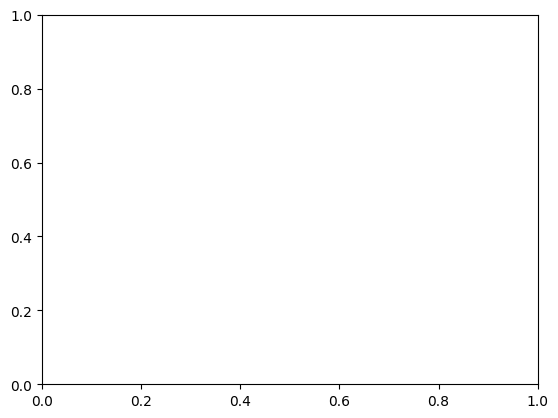

In [ ]:
model=LinearRegression()
model.fit(X_poly,Y)
print(model.coef_)
print(model.intercept_)
Y_pred=model.predict(X_poly)
print(Y_pred)
plt.scatter(X,Y,color='red')
plt.plot(X,Y_pred,color='blue')
plt.title('polynimail regression')
plt.show()